# 4주차 실습문제: 조건에 따른 열 추가 & 시각화

***

In [1]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 한글 폰트 설정 (맑은고딕)
plt.rc('font', family='Malgun Gothic') # For Windows

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [2]:
data = pd.read_csv('health2018.csv')
data.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


## 1. 저체중, 정상, 비만 간의 통계량 비교 및 시각화
### 1-1) state 열을 추가해서 BMI가 18.5 미만인 사람은 '저체중', 18.5 이상 25 미만인 사람은 '정상', BMI 25 이상인 사람은 '비만'으로 기록하시오.

In [3]:
# 비만, 정상, 저체중으로 분류하는 칼럼을 생성한다.
data['state'] = ['비만' if b >= 25 else '정상' if b >= 18.5  else '저체중' for b in data['BMI']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만


### 1-2) 정상, 비만, 저체중 그룹에서 혈당값(Blood_glucose)의 분포 차이를, boxplot으로 그려 비교하시오. 

<Axes: xlabel='state', ylabel='Blood_glucose'>

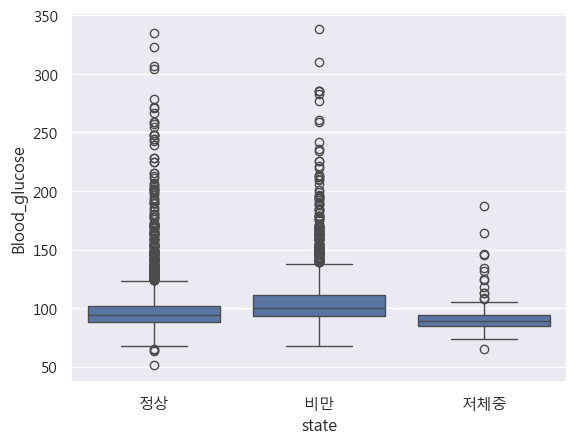

In [4]:
# 정상 비만, 저체중 그룹을 x, 혈당값을 y로 지정한 후 boxplot을 그린다.
sns.boxplot(x="state", y="Blood_glucose", data=data)

### 1-3) Diabete 열을 추가해서 혈당값이 126 이상인 환자를 1로, 그렇지 않은 정상인을 0으로 기록하고, '정상'/'비만'/'저체중' 집단 각각에서 당뇨병 환자의 비율을 구하시오.
각각의 집단별로 당뇨병 환자 비율이 각각 숫자로 나오도록 할 것. (필요하면 주석으로 설명)

In [5]:
# 126 이상인 환자를 1(당뇨병 환자)와 0(정상인)으로 분류하는 칼럼을 생성한다.
data['Diabete'] = [1 if a >= 126 else 0 for a in data['Blood_glucose']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,state,Diabete
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,1
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,1
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,0
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,0


In [6]:
# 1(당뇨병인 환자)와 0(정상인)으로 값이 0과 1만 있기 때문에 평균을 구하면 당뇨병 환자의 비율을 구할 수 있다.
grouped = data.groupby('state')['Diabete'].mean()
grouped

state
비만     0.130918
저체중    0.029703
정상     0.065206
Name: Diabete, dtype: float64

### 1-4) [고급문제] 위 boxplot 을 기준으로 '정상' 체중에서 혈당값(Blood_glucose)이 outlier인 샘플 갯수를 구해보시오.
참고: boxplot의 outlier 범위 기준. 
 * IQR = (75th percentile) - (25th percentile)
 * box 하한선 = (25th percentile) - (1.5 * IQR)
 * box 상한선 = (75th percentile) + (1.5 * IQR)
 
Series 객체에서 percentile을 구하는 법은 ?pd.Series.quantile 도움말 참고

In [7]:
# 정상인 데이터만 따로 구한다.
ndata = data[data['state'] == '정상']

# 1/4분위수, 3/4분위수인  q1,q2를 구한다.
q1 = ndata['Blood_glucose'].quantile(0.25)
q3 = ndata['Blood_glucose'].quantile(0.75)

# 사분위수 범위 itq를 구한다.
itq = q3 - q1

# box 상한선, 하한선을 구한다.
lowbox = q1 - 1.5 * itq
upbox = q3 + 1.5 * itq

# 범위를 넘어간 outliers를 구하고 그 수를 출력한다.
outliers = ndata[(ndata['Blood_glucose'] < lowbox) | (ndata['Blood_glucose'] > upbox)]
print(len(outliers))

265


***

## 2. 연령별 비만 유병율 시각화
### 2-1) 20대(19-29세), 30대(30-39세), 40대(40-49세), 50대(50-59세), 60대(60-69세), 70대(70세 이상)로 그룹을 나누고, 각 연령별 BMI의 분포를 violinplot으로 비교하시오.
x축 레이블로 20대, 30대, 40대, 50대, 60대, 70대가 명시되도록 할 것.
[총점 2점]
* 연령별 정렬이 안된 경우 1점 감점.
* 힌트: violinplot()에 order=[...] 옵션으로 순서 지정



<Axes: xlabel='ageRange', ylabel='Blood_glucose'>

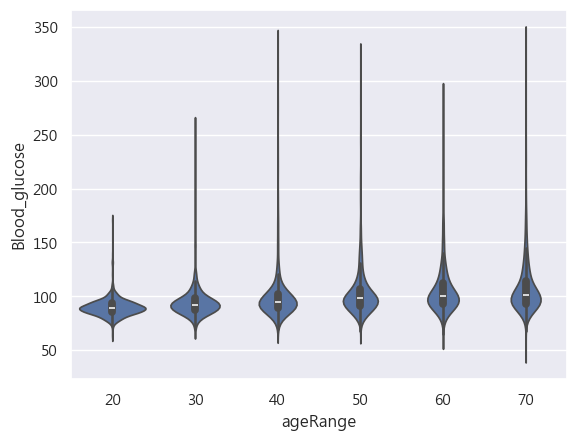

In [ ]:
# 각 연령대별로 분류하는 칼럼을 생성한다.
data['ageRange'] = ['70' if a >= 70 else '60' if a >= 60 else '50' if a >= 50 else '40' if a >= 40 else '30' if a >= 30 else '20' for a in data['age']]
sns.violinplot(x = "ageRange", y = "Blood_glucose", data = data, order=['20', '30', '40', '50', '60', '70'])

### 2-2) 각 연령대별로 비만(BMI 25~30), 고도비만(BMI >= 30)인 사람의 비율을 구하시오.
obese1_rate, obese2_rate로 각각 저장할 것.

In [24]:
# 연령대 리스트를 생성한다.
age = ['20', '30', '40', '50', '60', '70']

# 각 연령대별 비만, 고도비만 비율을 저장하는 리스트들을 만든다.
obese1_rate = []
obese2_rate = []

# 각 연령대별로 비율을 구한다.
for a in age :
    # 각 연령대 데이터를 추출한다.
    ageData = data[data['ageRange'] == a]

    # 'BMI' 칼럼을 통해비만인 데이터, 고도비만인 데이터를 각각 추출한다.
    obese1 = ageData[(ageData['BMI'] >= 25) & (ageData['BMI'] <30)]
    obese2 = ageData[(ageData['BMI'] >= 30)]
    
    # len함수를 이용하여 비율을 구한다.
    obese1_rate.append(len(obese1) / len(ageData))
    obese2_rate.append(len(obese2) / len(ageData))

# 각 연령대별 비만, 고도비만 비율을 출력한다.
for i in range(6) :
    print(f'{age[i]}대 비만 비율 : {obese1_rate[i]}')
    print(f'{age[i]}대 고도비만 비율 : {obese2_rate[i]}')

20대 비만 비율 : 0.17503392130257803
20대 고도비만 비율 : 0.06784260515603799
30대 비만 비율 : 0.27633069082672707
30대 고도비만 비율 : 0.07814269535673839
40대 비만 비율 : 0.3011722272317403
40대 고도비만 비율 : 0.056807935076645624
50대 비만 비율 : 0.3003442340791738
50대 고도비만 비율 : 0.035283993115318414
60대 비만 비율 : 0.336150234741784
60대 고도비만 비율 : 0.044131455399061034
70대 비만 비율 : 0.3339920948616601
70대 고도비만 비율 : 0.04743083003952569


### 2-3) 연령대별 비만, 고도비만의 비율을 누적 막대그래프로 그리시오.
고도비만(BMI >= 30)을 아래쪽에 먼저 그리고, 비만(BMI: 25~30)을 그 위에 쌓는 꼴로 그리시오.(아래 예시 참조)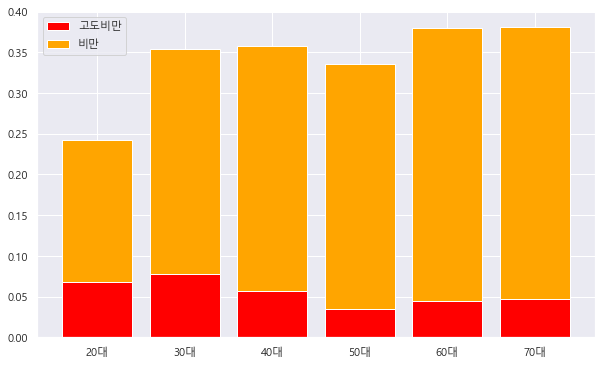

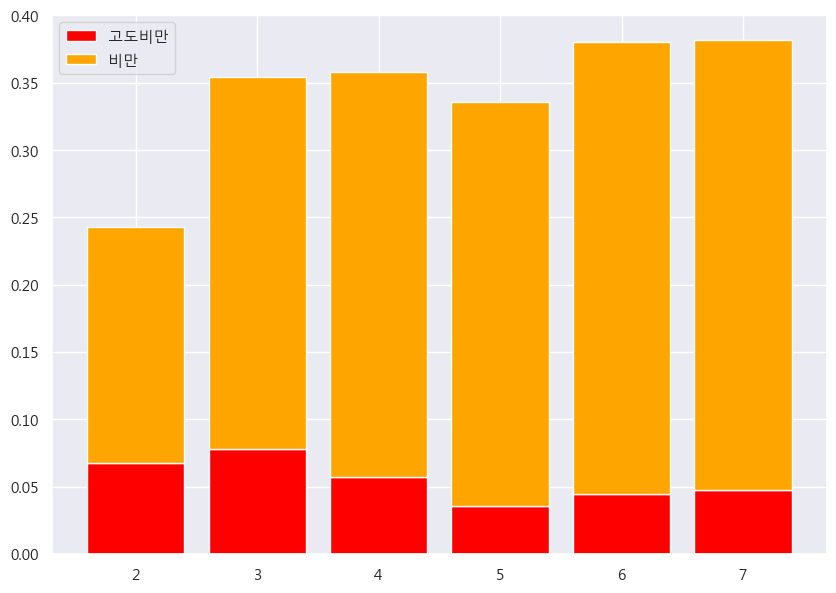

In [ ]:
# 앞서 구한 비율들의 자료형을 ndarray로 번경한다.
ndObese1 = np.array(obese1_rate)
ndObese2 = np.array(obese2_rate)

# x축을 설정한다.(각 연령대별로 2 = 20대, 3 = 30대, 4 = 40대, 5 = 50대, 6 = 60대, 7 = 70대 이상)
x = np.array([2,3,4,5,6,7])

# 그래프 크기를 설정한다.
plt.figure(figsize= (10, 7))

# 그래프를 출력한다.
p1 = plt.bar(x, ndObese2, color = 'red')
p2 = plt.bar(x, ndObese1, bottom=ndObese2, color = 'orange')

# 범례를 표시한다.
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))


### 2-4) 남성/여성별로 위 2-3) 그래프를 그리고 차이를 비교하시오.
남녀의 양상을 비교하여 정성적(qualitative) 차이를 서술하시오 (Markdown 셀에 기술). [총점 2점]

In [25]:
# 성별 리스트를 생성한다.
sex = ['M', 'F']
# 각 성별별로 비만, 고도비만 비율을 저장하는 리스트들을 생성한다.
obese1_srate = []
obese2_srate = []
# 각 성별별로 비만, 고도비만 비율을 구하여 앞서 선언한 리스트들에 저장한다.
for s in sex :
    sexData = data[data['sex'] == s]
    obese1 = sexData[(sexData['BMI'] >= 25) & (sexData['BMI'] <30)]
    obese2 = sexData[(sexData['BMI'] >= 30)]
    obese1_srate.append(len(obese1) / len(sexData))
    obese2_srate.append(len(obese2) / len(sexData))

for i in range(2) :
    print(f'{sex[i]} 비만 비율 : {obese1_srate[i]}, 고도비만 비율 : {obese2_srate}')

M 비만 비율 : 0.3573596358118361, 고도비만 비율 : [0.057663125948406675, 0.04981992797118848]
F 비만 비율 : 0.24309723889555823, 고도비만 비율 : [0.057663125948406675, 0.04981992797118848]


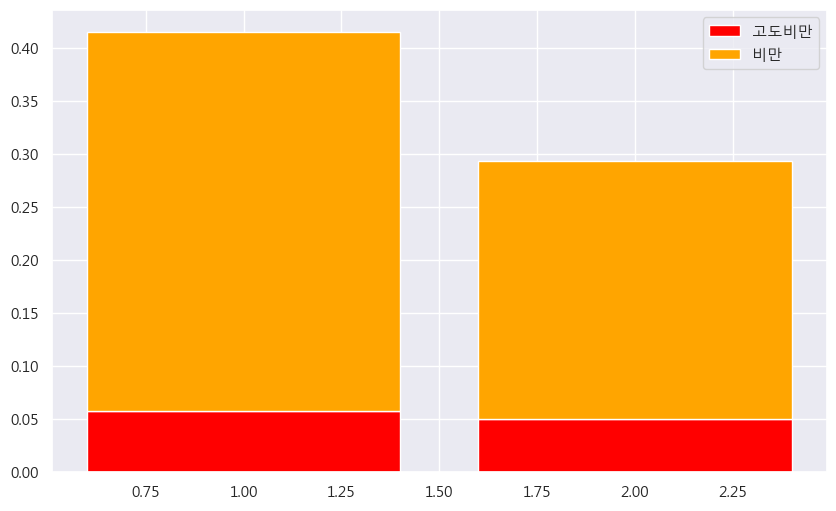

In [ ]:
# 앞서 구한 성별별로 비만, 고도비만 비율을 저장한 리스트들을 ndarray 형태로 저장한다.
ndObese1_sex = np.array(obese1_srate)
ndObese2_sex = np.array(obese2_srate)

# x축을 설정한다.(1 = male, 2 = female)
x = np.array([1,2])

# 그래프 크기를 지정한다.
plt.figure(figsize= (10, 6))

# 그래프를 출력한다.
p1 = plt.bar(x, ndObese2_sex, color = 'red')
p2 = plt.bar(x, ndObese1_sex, bottom=ndObese2_sex, color = 'orange')

# 범례를 표시한다.
plt.legend((p1[0], p2[0]), ('고도비만', '비만'))

남성은 여성에 비해 비만 비율이 상대적으로 높게 나타났다. 이는 남성이 건강 관리에 있어 체중 조절이나 식습관에 대해 다소 소홀하거나 신체 활동보다는 고열량 음식을 선호하는 경향이 반영된 것으로 볼 수 있다. 반면 여성은 외모나 체형에 대한 사회적 기대나 압력이 상대적으로 크기 때문에 체중 관리에 더 신경 쓰고 적극적으로 개입하려는 경향이 있을 수 있다. 하지만 고도비만의 경우 남녀 모두 비슷한 비율을 보여 일정 수준 이상의 비만으로 진행되었을 때는 성별보다는 개인의 생활습관이나 건강 상태가 더 큰 영향을 주었을 가능성이 있다.